In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from matplotlib.patches import Rectangle

In [2]:
images_path = '/mnt/data0-nfs/cesnyde2/STREETS-unsupervised-bfs/ImageData'
gt_path = 'BBox-Annotations'
view = 'Almond at Washington East'
input_shape = [480, 720]
output_shape = input_shape
stride = 6
single_image_dataset = BBoxBFSDataset(images_path, gt_path, view, input_shape, output_shape)
sequence_dataset = BBoxSequenceDataset(images_path, gt_path, view, input_shape, output_shape, stride)

torch.Size([3, 480, 720])
11


(-0.5, 719.5, 479.5, -0.5)

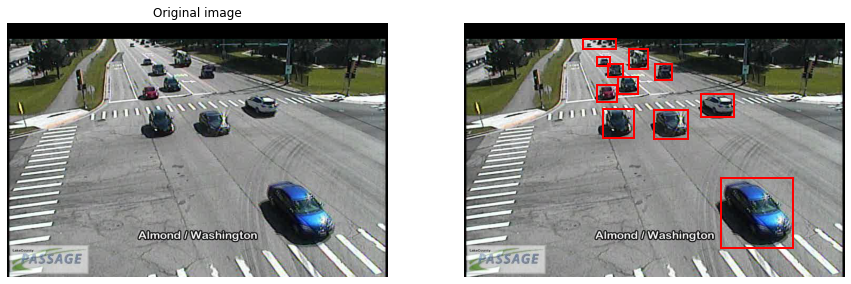

In [3]:
# demo of single image dataset
idx = 0
image, target = single_image_dataset[idx]
print(image.shape)
print(len(target))
# re-arrange image dimensions and convert to numpy array for plotting
numpy_image = image.permute(1, 2, 0).numpy()
plt.figure(figsize=(15, 9))
plt.subplot(121)
plt.imshow(numpy_image)
plt.title('Original image')
plt.axis(False)
plt.subplot(122)
plt.imshow(numpy_image)
ax = plt.gca()
for i in range(len(target)):
    t = target[i]
    rect = Rectangle((t[0], t[1]), t[2]-t[0], t[3]-t[1], linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.axis(False)

torch.Size([6, 3, 480, 720])
9
0


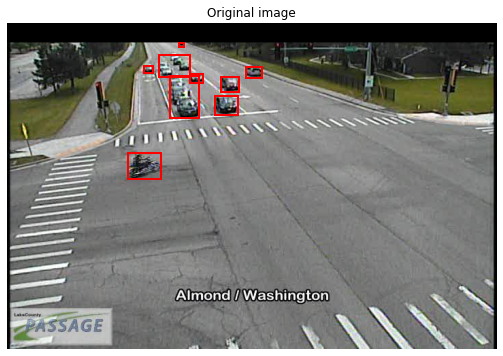

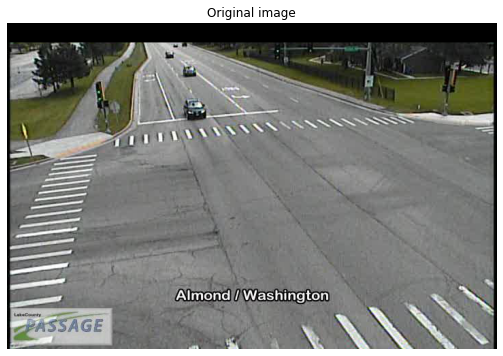

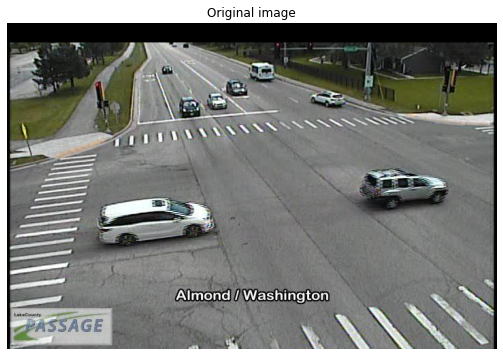

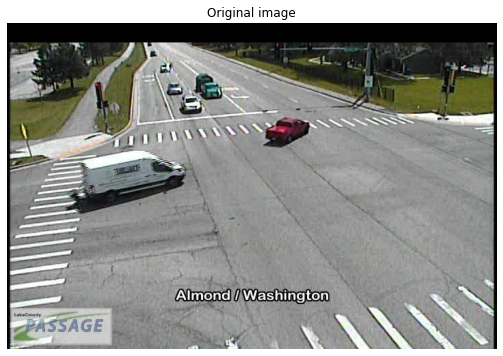

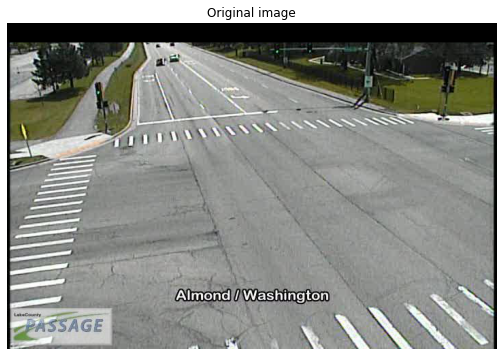

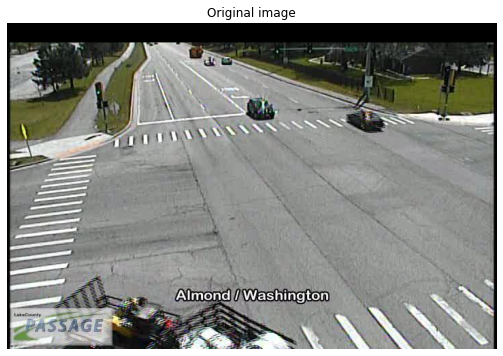

In [4]:
# demo of sequence image dataset
idx = 0
images, target, gt_index = sequence_dataset[idx]
print(images.shape)
print(len(target))
print(gt_index) # which image in the sequence in annotated
for i in range(images.size(0)):
    numpy_image = images[i].permute(1, 2, 0).numpy()
    plt.figure(figsize=(10, 6))
    plt.imshow(numpy_image)
    plt.title('Original image')
    if i==gt_index:
        ax = plt.gca()
        for j in range(len(target)):
            t = target[j]
            rect = Rectangle((t[0], t[1]), t[2]-t[0], t[3]-t[1], linewidth=2,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    plt.axis(False)

(-0.5, 719.5, 479.5, -0.5)

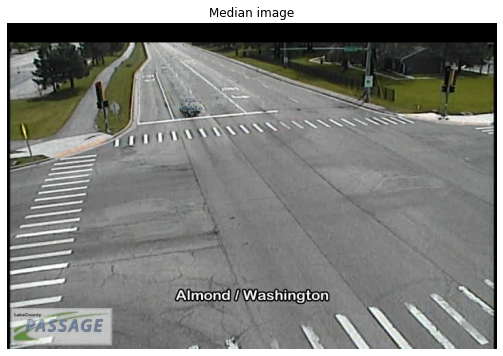

In [5]:
# compute and display median image
median_image, _ = torch.median(images, dim=0) # remove first dimension which stacks all the images
median_numpy_image = median_image.permute(1, 2, 0).numpy()
plt.figure(figsize=(10, 6))
plt.imshow(median_numpy_image)
plt.title('Median image')
plt.axis(False)